In [15]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt

df_users = pd.read_json(os.path.join(sys.path[0], 'src', 'users-data', 'users.json'))

df_users


,Manifold,Byaku,Pedro,Peco
nombre,Marquitos,Lautaro,Pedro,Daniela
edad,28,26,22,33
genero,Masculino,Masculino,Masculino,Femenino


In [16]:

df = pd.read_csv(os.path.join(sys.path[0], 'src', 'log', 'users_logs.csv'), encoding='utf-8')

df

,User,Action,Time
0,Manifold,Creo nuevo perfil.,16-05-23 10:26:27
1,Manifold,Abrió la ventana de etiquetas pero no generó e...,16-05-23 10:26:30
2,Manifold,Cerró sesión,18-05-23 10:26:33
3,Manifold,Creo nuevo perfil.,18-05-23 10:30:15
4,Manifold,Creó un collage,18-06-23 10:30:15
5,Manifold,Creó un meme,17-05-23 10:30:15
6,Manifold,Modificó información en las imágenes del direc...,15-05-23 15:30:17
7,Manifold,El usuario editó su perfil.,18-05-23 10:31:11
8,Manifold,Cambió la configuración,20-05-23 10:31:17
9,Manifold,El usuario entro a editar perfil pero no lo ed...,21-05-23 10:31:35


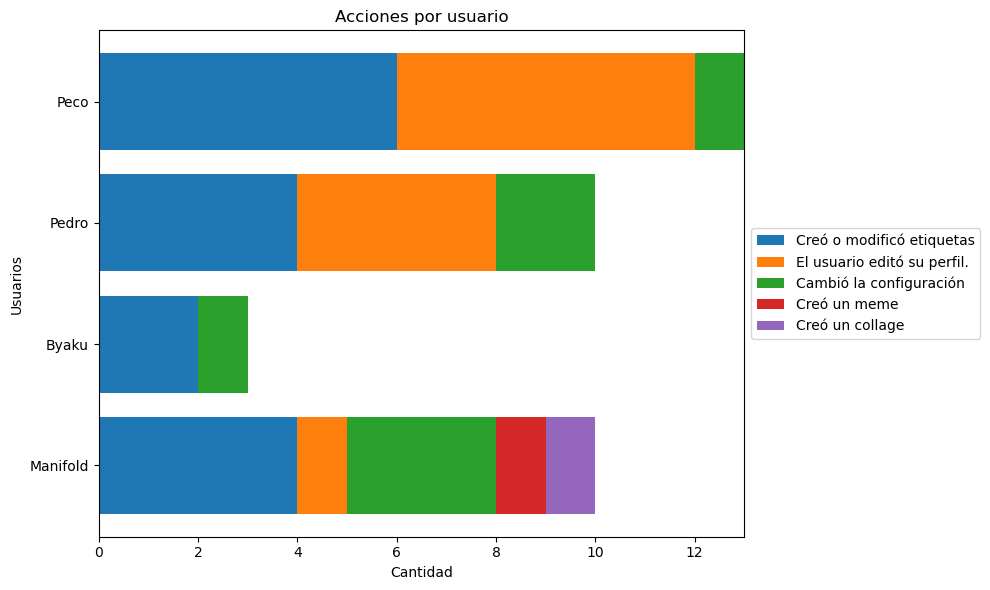

In [17]:


users = df["User"].unique()
etiquetas_nuevas = []
etiquetas_cambios = []
editoperfil = []
configuracion = []
memes = []
collage = []

for name in users:
    etiquetas_nuevas.append(df[(df["Action"] == "Guardó información nueva en las imágenes del directorio") & (df["User"] == name)]["Action"].count())
    etiquetas_cambios.append(df[(df["Action"] == "Modificó información en las imágenes del directorio") & (df["User"] == name)]["Action"].count())
    editoperfil.append(df[(df["Action"] == "El usuario editó su perfil.") & (df["User"] == name)]["Action"].count())
    configuracion.append(df[(df["Action"] == "Cambió la configuración") & (df["User"] == name)]["Action"].count())
    memes.append(df[(df["Action"] == "Creó un meme") & (df["User"] == name)]["Action"].count())
    collage.append(df[(df["Action"] == "Creó un collage") & (df["User"] == name)]["Action"].count())

etiquetas = [sum(x) for x in zip(etiquetas_nuevas, etiquetas_cambios)]

# Create a horizontal stacked bar plot
plt.figure(figsize=(10, 6))
plt.barh(users, etiquetas, label='Creó o modificó etiquetas')
plt.barh(users, editoperfil, left=etiquetas, label='El usuario editó su perfil.')
plt.barh(users, configuracion, left=[sum(x) for x in zip(etiquetas, editoperfil)], label='Cambió la configuración')
plt.barh(users, memes, left=[sum(x) for x in zip(etiquetas, editoperfil, configuracion)], label='Creó un meme')
plt.barh(users, collage, left=[sum(x) for x in zip(etiquetas, editoperfil, configuracion, memes)], label='Creó un collage')

plt.xlabel('Cantidad')
plt.ylabel('Usuarios')
plt.title('Acciones por usuario')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()


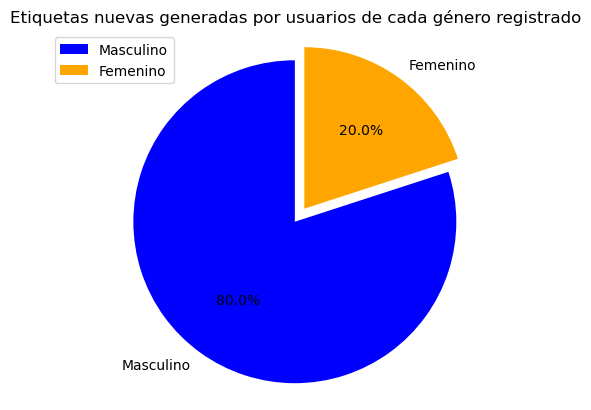

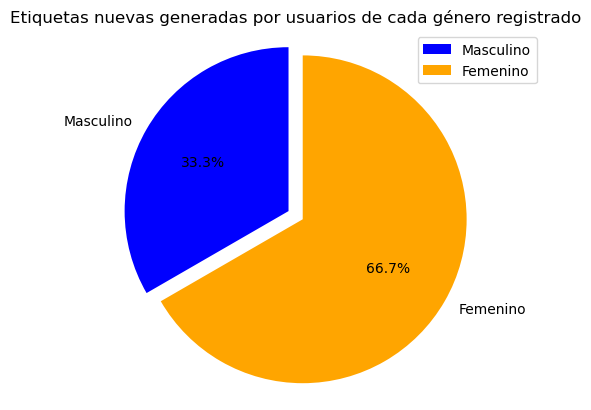

In [18]:
#colors = ['blue', 'green', 'blue', 'orange']
explode = [0.1, 0.0]
gens = []

for name in df["User"]:
    gens.append(df_users[name]["genero"])
df["Generos"] = gens

gen_unicos = df["Generos"].unique()

suma = []
for gen in gen_unicos:
    count = ((df["Generos"] == gen) & (df["Action"] == "Guardó información nueva en las imágenes del directorio")).sum()
    suma.append(count)

plt.pie(suma, labels=gen_unicos, colors=['blue', 'orange'], explode=explode, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a legend
plt.legend(loc='upper left')

plt.title("Etiquetas nuevas generadas por usuarios de cada género registrado")
# Display the pie chart
plt.show()


suma = []
for gen in gen_unicos:
    count = ((df["Generos"] == gen) & (df["Action"] == "Modificó información en las imágenes del directorio")).sum()
    suma.append(count)

plt.pie(suma, labels=gen_unicos, colors=['blue', 'orange'], explode=explode, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a legend
plt.legend()

plt.title("Etiquetas nuevas generadas por usuarios de cada género registrado")
# Display the pie chart
plt.show()


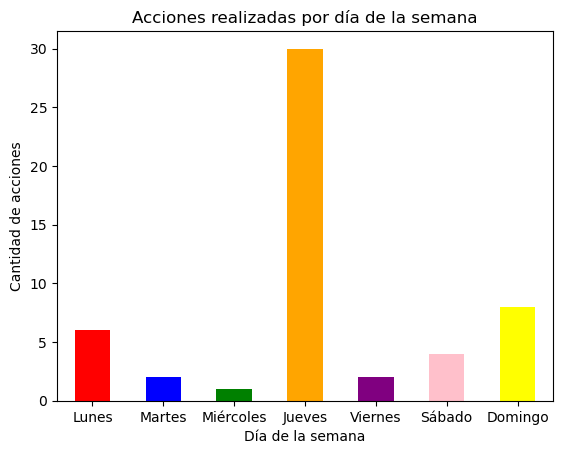

In [19]:
weekday_mapping = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
day_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%y %H:%M:%S')
df['DayOfWeek'] = df['Time'].dt.day_name().map(weekday_mapping)
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)
# Group the data by day of the week and count the number of actions
actions_by_day = df['DayOfWeek'].value_counts().sort_index()

# Create a vertical bar chart
actions_by_day.plot(kind='bar', color=["red", "blue", "green", "orange", "purple", "pink", "yellow"])

# Set the labels and title
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de acciones')
plt.title('Acciones realizadas por día de la semana')
plt.xticks(rotation=0)
# Display the chart
plt.show()
